# Proyek Klasifikasi Gambar: Animal Image Classification Dataset
- **Nama:** Putra Faaris Prayoga
- **Email:** putrafaariz47@gmail.com
- **ID Dicoding:** putra_faaris

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 26.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successful

In [3]:
# Sistem dan File Management
import os
import shutil
import random

# Data Handling
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Upload file di Colab
from google.colab import files

# Preprocessing dan Augmentasi Gambar
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    load_img,
    img_to_array,
    array_to_img,
    save_img
)

# Train/Test Split
from sklearn.model_selection import train_test_split

# Metrik Evaluasi
from sklearn.metrics import confusion_matrix

# TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# TensorFlow Lite Converter
from tensorflow.lite.python import lite

# Opsional untuk konversi ke TF.js (butuh instalasi CLI)
# !tensorflowjs_converter --input_format=keras model_name/ output_folder/

## Data Preparation

### Data Loading

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putrafaariz","key":"1f6e843eec252ca279155d06e01d435d"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d borhanitrash/animal-image-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset
License(s): MIT
 96% 37.0M/38.4M [00:01<00:00, 39.1MB/s]
100% 38.4M/38.4M [00:01<00:00, 25.2MB/s]


In [7]:
!unzip animal-image-classification-dataset.zip

Archive:  animal-image-classification-dataset.zip
  inflating: Animals/cats/0_0001.jpg  
  inflating: Animals/cats/0_0002.jpg  
  inflating: Animals/cats/0_0003.jpg  
  inflating: Animals/cats/0_0004.jpg  
  inflating: Animals/cats/0_0005.jpg  
  inflating: Animals/cats/0_0006.jpg  
  inflating: Animals/cats/0_0007.jpg  
  inflating: Animals/cats/0_0008.jpg  
  inflating: Animals/cats/0_0009.jpg  
  inflating: Animals/cats/0_0010.jpg  
  inflating: Animals/cats/0_0011.jpg  
  inflating: Animals/cats/0_0012.jpg  
  inflating: Animals/cats/0_0013.jpg  
  inflating: Animals/cats/0_0014.jpg  
  inflating: Animals/cats/0_0015.jpg  
  inflating: Animals/cats/0_0016.jpg  
  inflating: Animals/cats/0_0017.jpg  
  inflating: Animals/cats/0_0018.jpg  
  inflating: Animals/cats/0_0019.jpg  
  inflating: Animals/cats/0_0020.jpg  
  inflating: Animals/cats/0_0021.jpg  
  inflating: Animals/cats/0_0022.jpg  
  inflating: Animals/cats/0_0023.jpg  
  inflating: Animals/cats/0_0024.jpg  
  inflating: A

### Data Preprocessing

#### Labeling dan Ekstraksi



In [8]:
# Hitung jumlah per kelas
data_dir = 'Animals'
categories = os.listdir(data_dir)

# Ambil label dan gambar
data = []
for category in categories:
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            data.append((img_name, category))

df = pd.DataFrame(data, columns=['filename', 'label'])

<ipython-input-9-679ce068ae5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


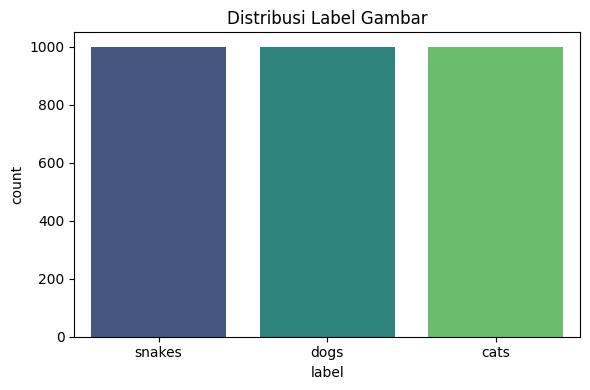

In [9]:
# Plot distribusi label
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribusi Label Gambar')
plt.tight_layout()
plt.show()

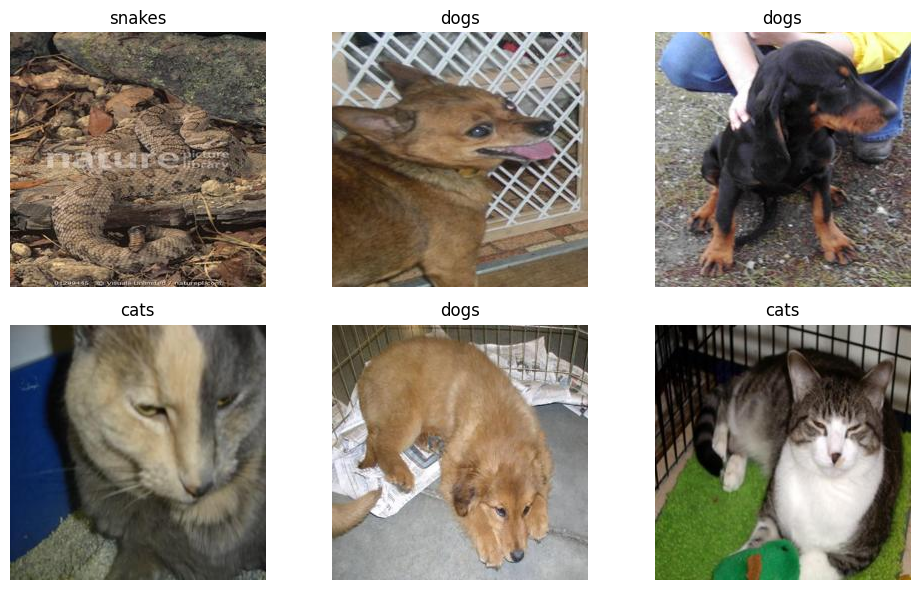

In [10]:
# Tampilkan contoh gambar
plt.figure(figsize=(10,6))
for i in range(6):
    label = random.choice(df['label'].unique())
    sample = df[df['label'] == label].sample()
    img_path = os.path.join(data_dir, label, sample['filename'].values[0])
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Augmentasi untuk memperbanyak data


In [11]:
def augment_images(source_dir, target_dir, augment_count=5, image_size=(224, 224)):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for filename in os.listdir(source_dir):
        file_path = os.path.join(source_dir, filename)

        try:
            img = load_img(file_path, target_size=image_size)
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            # Simpan gambar asli juga
            save_img(os.path.join(target_dir, filename), img)

            # Buat augmentasi
            prefix = os.path.splitext(filename)[0]
            i = 0
            for batch in datagen.flow(x, batch_size=1):
                aug_filename = f"{prefix}_aug{i}.jpg"
                save_img(os.path.join(target_dir, aug_filename), array_to_img(batch[0]))
                i += 1
                if i >= augment_count:
                    break
        except Exception as e:
            print(f"Gagal augment {file_path}: {e}")


In [12]:
datagen = ImageDataGenerator(
    brightness_range=[0.2, 1.0],  # Mencerahkan gambar
    horizontal_flip=True,     # Membalik gambar secara horizontal
    vertical_flip=True,     # Membalik gambar secara horizontal
    fill_mode='nearest'       # Metode pengisian piksel yang hilang setelah transformasi
)

In [13]:
#Augmentasi Manual
augment_images(
    source_dir='Animals/cats',
    target_dir='Animals/Aug/cats',
    augment_count=2
)

augment_images(
    source_dir='Animals/snakes',
    target_dir='Animals/Aug/snakes',
    augment_count=2
)

augment_images(
    source_dir='Animals/dogs',
    target_dir='Animals/Aug/dogs',
    augment_count=2
)

In [14]:
#salin ke satu folder
def copy_images(source_dir, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for filename in os.listdir(source_dir):
        file_path = os.path.join(source_dir, filename)
        target_path = os.path.join(target_dir, filename)
        shutil.copy2(file_path, target_path)
        print(f"Berhasil menyalin {file_path} ke {target_path}")

In [15]:
copy_images(
    source_dir='Animals/cats',
    target_dir='Animals/Aug/cats'
)

copy_images(
    source_dir='Animals/dogs',
    target_dir='Animals/Aug/dogs'
)

copy_images(
    source_dir='Animals/snakes',
    target_dir='Animals/Aug/snakes'
)

Berhasil menyalin Animals/cats/0_0982.jpg ke Animals/Aug/cats/0_0982.jpg
Berhasil menyalin Animals/cats/0_0256.jpg ke Animals/Aug/cats/0_0256.jpg
Berhasil menyalin Animals/cats/0_0381.jpg ke Animals/Aug/cats/0_0381.jpg
Berhasil menyalin Animals/cats/0_0951.jpg ke Animals/Aug/cats/0_0951.jpg
Berhasil menyalin Animals/cats/0_0343.jpg ke Animals/Aug/cats/0_0343.jpg
Berhasil menyalin Animals/cats/0_0406.jpg ke Animals/Aug/cats/0_0406.jpg
Berhasil menyalin Animals/cats/0_0757.jpg ke Animals/Aug/cats/0_0757.jpg
Berhasil menyalin Animals/cats/0_0562.jpg ke Animals/Aug/cats/0_0562.jpg
Berhasil menyalin Animals/cats/0_0570.jpg ke Animals/Aug/cats/0_0570.jpg
Berhasil menyalin Animals/cats/0_0887.jpg ke Animals/Aug/cats/0_0887.jpg
Berhasil menyalin Animals/cats/0_0001.jpg ke Animals/Aug/cats/0_0001.jpg
Berhasil menyalin Animals/cats/0_0487.jpg ke Animals/Aug/cats/0_0487.jpg
Berhasil menyalin Animals/cats/0_0762.jpg ke Animals/Aug/cats/0_0762.jpg
Berhasil menyalin Animals/cats/0_0581.jpg ke Animal

<ipython-input-16-b2dc963d4b71>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_balanced, palette='Set2')


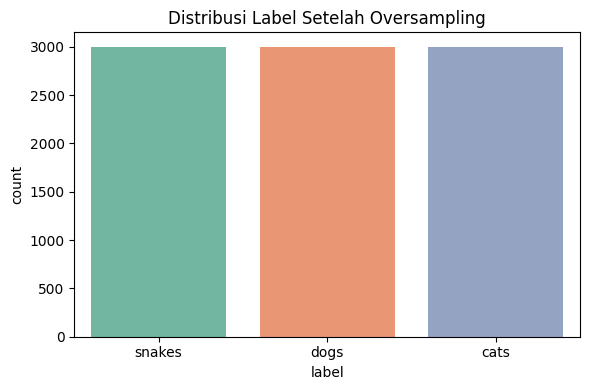

In [16]:
oversampled_dir = 'Animals/Aug'
categories = os.listdir(oversampled_dir)

data = []
for category in categories:
    for img_name in os.listdir(os.path.join(oversampled_dir, category)):
        data.append((img_name, category))

df_balanced = pd.DataFrame(data, columns=['filename', 'label'])

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df_balanced, palette='Set2')
plt.title('Distribusi Label Setelah Oversampling')
plt.tight_layout()
plt.show()

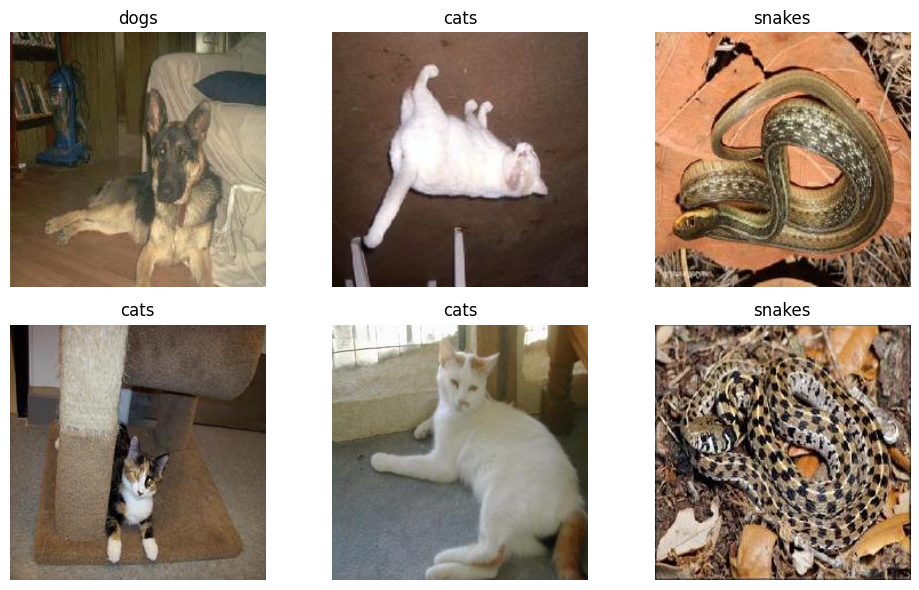

In [17]:
# tampilkan contoh gambar
plt.figure(figsize=(10,6))
for i in range(6):
    label = random.choice(df_balanced['label'].unique())
    sample = df_balanced[df_balanced['label'] == label].sample()
    img_path = os.path.join(oversampled_dir, label, sample['filename'].values[0])
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Spliting data

In [18]:
# Path direktori oversampled
source_dir = 'Animals/Aug'
base_output_dir = 'Animals/split'

# Rasio split
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Buat folder output
for split in ['train', 'val', 'test']:
    for category in os.listdir(source_dir):
        os.makedirs(os.path.join(base_output_dir, split, category), exist_ok=True)

# Proses split
for category in os.listdir(source_dir):
    category_path = os.path.join(source_dir, category)
    images = os.listdir(category_path)

    train_val, test = train_test_split(images, test_size=test_ratio, random_state=42)
    train, val = train_test_split(train_val, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

    for split_name, split_data in zip(['train', 'val', 'test'], [train, val, test]):
        for img_name in split_data:
            src = os.path.join(category_path, img_name)
            dst = os.path.join(base_output_dir, split_name, category, img_name)
            shutil.copy2(src, dst)

    print(f"{category}: {len(train)} train, {len(val)} val, {len(test)} test")

snakes: 2400 train, 300 val, 300 test
dogs: 2400 train, 300 val, 300 test
cats: 2400 train, 300 val, 300 test


### Datagen

In [19]:
train_datagen = ImageDataGenerator()
val_test_datagen = ImageDataGenerator()

# Path dataset
base_dir = 'Animals/split'

# Buat generator
train_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

val_gen = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)


Found 7200 images belonging to 3 classes.
Found 900 images belonging to 3 classes.
Found 900 images belonging to 3 classes.


## Model

### ARC model

In [20]:
model = models.Sequential([
    # Input layer
    keras.layers.Rescaling(1./255, input_shape=[224, 224, 3]),

    # Konvolusi 1 + Batch Normalization
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Konvolusi 2 + Batch Normalization
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Konvolusi 3 + Batch Normalization
    layers.Conv2D(128, (5, 5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

     # Konvolusi 3 + Batch Normalization
    layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((3, 3)),
    layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting


    # Konvolusi 3 + Batch Normalization
    layers.Conv2D(512, (7, 7), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((3, 3)),
    layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting


    # Flatten layer (mengubah data menjadi vektor satu dimensi)
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting

    # Output layer (softmax untuk klasifikasi multi kelas)
    layers.Dense(3, activation='softmax')  # 3 kelas: cat, dog, snake
])

# Ringkasan model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 512)           │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 9, 9, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │              

 Total params: 8,061,123 (30.75 MB)

 Trainable params: 8,059,139 (30.74 MB)

 Non-trainable params: 1,984 (7.75 KB)

### earlystop & Optimizer

In [21]:
early_stopping = EarlyStopping(
    monitor='val_loss',        # Memantau 'val_loss' selama pelatihan
    patience=10,                # Jumlah epoch yang diizinkan tanpa peningkatan sebelum pelatihan dihentikan
    restore_best_weights=True  # Mengembalikan bobot model ke keadaan terbaik saat training dihentikan
)

In [24]:
model.compile(
    optimizer= Adam(learning_rate=0.0001) ,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Run Model

In [25]:
history = model.fit(
    train_gen,
    epochs=100,  # Tentukan jumlah epoch maksimal
    validation_data= val_gen,  # Gunakan validation set yang sudah ada
    callbacks=[early_stopping]  # Menambahkan EarlyStopping sebagai callback
)

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - accuracy: 0.7487 - loss: 0.5721 - val_accuracy: 0.7578 - val_loss: 0.5255
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.7572 - loss: 0.5526 - val_accuracy: 0.7278 - val_loss: 0.5890
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.7843 - loss: 0.5132 - val_accuracy: 0.7822 - val_loss: 0.4797
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.7851 - loss: 0.4954 - val_accuracy: 0.7667 - val_loss: 0.5016
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.8035 - loss: 0.4554 - val_accuracy: 0.8367 - val_loss: 0.4114
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.8202 - loss: 0.4236 - val_accuracy: 0.8178 - val_loss: 0.4315
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.8387 - loss: 0.3679 - val_accuracy: 0.8278 - val_loss: 0.4039
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.8443 - loss: 

## Evaluasi dan Visualisasi

### Visualisasi Accuracy dan loss

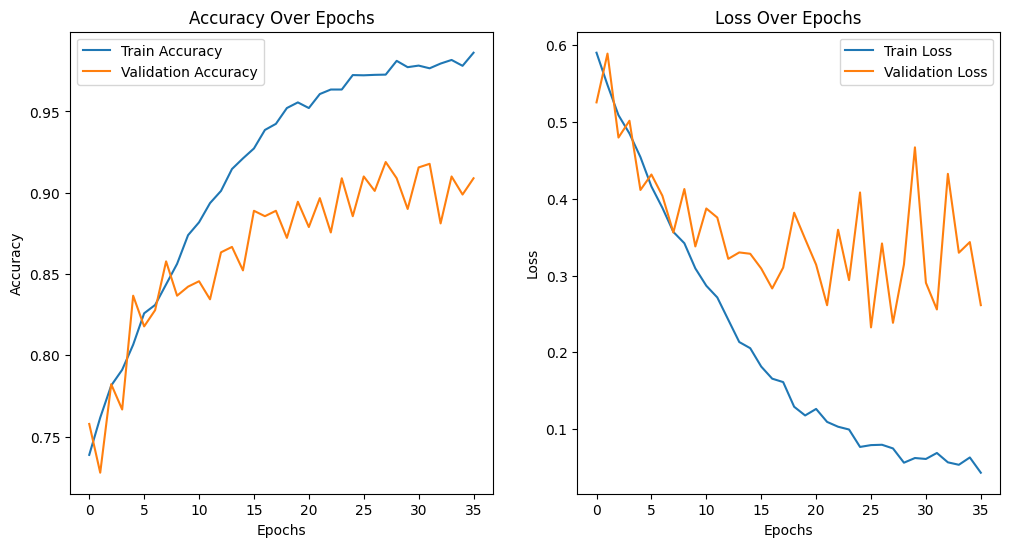

In [26]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Test Accuracy

In [27]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8618 - loss: 0.4558
Test Loss: 0.316855251789093
Test Accuracy: 0.903333306312561


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step


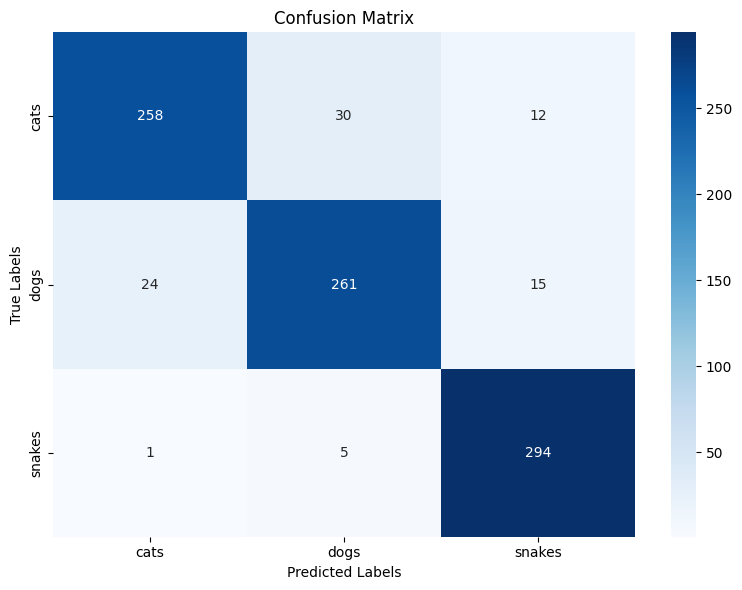

In [28]:
# Ambil prediksi dari model pada dataset uji
y_pred = model.predict(test_gen, steps=len(test_gen))  # Mengambil prediksi dari test set
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi untuk multi-class classification

# Ambil label sebenarnya dari test set
y_true = test_gen.classes  # Ini akan mengambil label sebenarnya dari test generator

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasikan confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Konversi Model

In [29]:
model.save('saved_model.h5')  # Output: saved_model/

In [36]:
model.export("saved_model/")


Saved artifact at 'saved_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135554661230992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661229072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661230800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661228880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661229264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661230416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621454288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621455632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621456016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621454864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621454096: T

In [34]:
# Convert to TensorFlow Lite format
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Convert to TensorFlow.js format
!tensorflowjs_converter --input_format=keras animal_classification_saved_model/ model_tfjs/


Saved artifact at '/tmp/tmpou8ckm6g'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135554661230992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661229072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661230800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661228880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661229264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661230416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621454288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621455632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621456016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621454864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13555462145409

In [31]:
# Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp27_8irxf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135554661230992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661229072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661230800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661228880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661229264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554661230416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621454288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621455632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621456016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135554621454864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13555462145409

In [32]:
!tensorflowjs_converter --input_format=keras saved_model.h5 tfjs_model/

2025-06-15 18:28:43.106657: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750012123.144598   11747 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750012123.157349   11747 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750012123.183285   11747 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750012123.183332   11747 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750012123.183342   11747 computation_placer.cc:177] computation placer alr

In [33]:
labels = ['cats', 'dogs', 'snakes']

with open('label.txt', 'w') as f:
    for label in labels:
        f.write(f"{label}\n")
files.download('label.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)